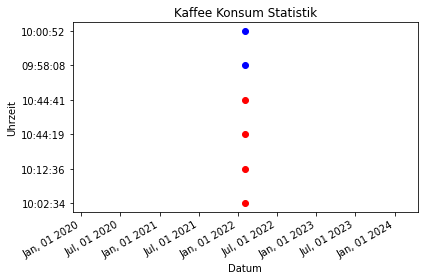

In [21]:
import pandas as pd
from app.service.coffee_service import get_hist
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import dates as mpl_dates

data = get_hist()
df = pd.DataFrame()

dates = [x[:10] for x in data["dates"]]
time = [x[11:] for x in data["dates"]]

df["Datum"] = pd.to_datetime(dates)
df["Uhrzeit"] = time
df["Art"] = data["coffee_types"]

#Filter for espresso or double espresso
filter_db_es = (df["Art"] == "double_espresso")
d_espresso_df = df.loc[filter_db_es]
filter_es = (df["Art"] == "espresso")
espresso_df = df.loc[filter_es]

#sort by time
d_espresso_df.sort_values(by=['Uhrzeit'])
espresso_df.sort_values(by=['Uhrzeit'])

#variables for plotting
es_datum = d_espresso_df["Datum"]
es_art = d_espresso_df["Art"]
es_zeit = d_espresso_df["Uhrzeit"]
db_es_datum = espresso_df["Datum"]
db_es_art = espresso_df["Art"]
db_es_zeit = espresso_df["Uhrzeit"]

#Plot
plt.plot_date(es_datum, es_zeit, "ro")
plt.plot_date(db_es_datum, db_es_zeit, "bo")

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter("%b, %d %Y")
plt.gca().xaxis.set_major_formatter(date_format)
plt.title("Kaffee Konsum Statistik")
plt.xlabel("Datum")
plt.ylabel("Uhrzeit")
plt.tight_layout()
plt.savefig("test.png")

In [4]:
import pandas as pd
df = pd.read_csv("Kaffeedaten4.csv", sep=";")

In [5]:
df.head()

,Datum,Uhrzeit,Art
0,12.12.2021,10:12:00,Kaffee
1,13.12.2021,09:13:00,Kaffee
2,14.12.2021,14:44:00,Kaffee
3,14.12.2021,12:12:00,Kaffee
4,12.12.2021,12:33:00,Kaffee


In [23]:
a = df["Datum"].to_list()
b = df["Uhrzeit"].to_list()

c = pd.to_datetime([a[x]+" "+b[x] for x in range(len(a))])
print([str(x) for x in c.to_list()])

['2021-12-12 10:12:00', '2021-12-13 09:13:00', '2021-12-14 14:44:00', '2021-12-14 12:12:00', '2021-12-12 12:33:00', '2021-12-20 09:16:00', '2021-12-20 09:16:00', '2021-12-15 08:07:00', '2021-12-15 09:16:00', '2021-12-15 09:16:00', '2021-12-15 12:16:00', '2021-12-15 11:16:00', '2021-12-16 14:33:00', '2021-12-16 06:55:00', '2021-12-17 09:56:00', '2021-12-17 05:45:00', '2021-12-17 22:23:00', '2021-12-17 12:23:00', '2021-12-18 15:34:00', '2021-12-18 06:36:00', '2021-12-18 12:11:00', '2021-12-18 15:43:00', '2021-12-18 14:34:00', '2021-12-18 23:02:00', '2021-12-19 22:33:00', '2021-12-17 06:45:00', '2021-12-17 08:45:00', '2021-12-17 09:45:00']


In [31]:
d = df["Art"].to_list()
d = [x.replace("Kaffee", "double_espresso") for x in d]
d = [x.replace("Espresso", "espresso") for x in d]
print(d)

['double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'double_espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso', 'espresso']
